В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cars_df = pd.read_csv("drive/MyDrive/ML/cars.csv")

In [4]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [5]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
cars_df.dtypes

,0
Car_ID,int64
Brand,object
Model,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,int64
Engine,int64


In [7]:
categorical_columns = cars_df.select_dtypes(include=['object'])
categorical_columns

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [8]:
for col in categorical_columns.columns:
    print(f"{col}: {cars_df[col].nunique()} унікальних значень")

Brand: 11 унікальних значень
Model: 58 унікальних значень
Fuel_Type: 2 унікальних значень
Transmission: 2 унікальних значень
Owner_Type: 3 унікальних значень


In [ ]:
numerical_columns = cars_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

**Висновок**

13 колонок:

**5 категоріальні** - Brand, Model, Fuel_Type, Transmission, Owner_Type
бінарні  - Fuel_Type, Transmission
мультикатегоріальні - Brand, Model, Owner_Type

**8 числові** - Car_ID, Year, Kilometers_Driven, Mileage, Engine, Power,
       Seats, Price

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [9]:
from sklearn.model_selection import train_test_split

X = cars_df.drop(columns=["Price"])
y = cars_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print("Розміри тренувальних і тестових наборів:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Розміри тренувальних і тестових наборів:
X_train: (80, 12), y_train: (80,)
X_test: (20, 12), y_test: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [10]:
fuel_type_counts = cars_df['Fuel_Type'].value_counts()
print(fuel_type_counts)

transmission_counts = cars_df['Transmission'].value_counts()
print(transmission_counts)


Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64
Transmission
Automatic    57
Manual       43
Name: count, dtype: int64


In [11]:
fuel_codes = {'Diesel': 0, 'Petrol': 1}
transmission_codes = {'Manual': 0, 'Automatic': 1}

In [12]:
X_train['Fuel_Type_Code'] = X_train['Fuel_Type'].map(fuel_codes)
X_test['Fuel_Type_Code'] = X_test['Fuel_Type'].map(fuel_codes)

X_train['Transmission_Code'] = X_train['Transmission'].map(transmission_codes)
X_test['Transmission_Code'] = X_test['Transmission'].map(transmission_codes)

In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(handle_unknown='ignore')

brand_encoded_train = ohe.fit_transform(X_train[['Brand']]).toarray()
brand_encoded_test = ohe.transform(X_test[['Brand']]).toarray()

brand_columns = ohe.get_feature_names_out(['Brand'])
brand_encoded_train_df = pd.DataFrame(brand_encoded_train, columns=brand_columns, index=X_train.index)
brand_encoded_test_df = pd.DataFrame(brand_encoded_test, columns=brand_columns, index=X_test.index)

X_train = pd.concat([X_train, brand_encoded_train_df], axis=1).drop(columns=['Brand'])
X_test = pd.concat([X_test, brand_encoded_test_df], axis=1).drop(columns=['Brand'])

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code
83,84,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1
55,56,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
26,27,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
54,55,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0
19,20,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code
17,18,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
41,42,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0
92,93,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0
14,15,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
68,69,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_X_train = X_train.select_dtypes(include=['number'])

data_with_target = pd.concat([numerical_X_train, y_train.reset_index(drop=True)], axis=1)


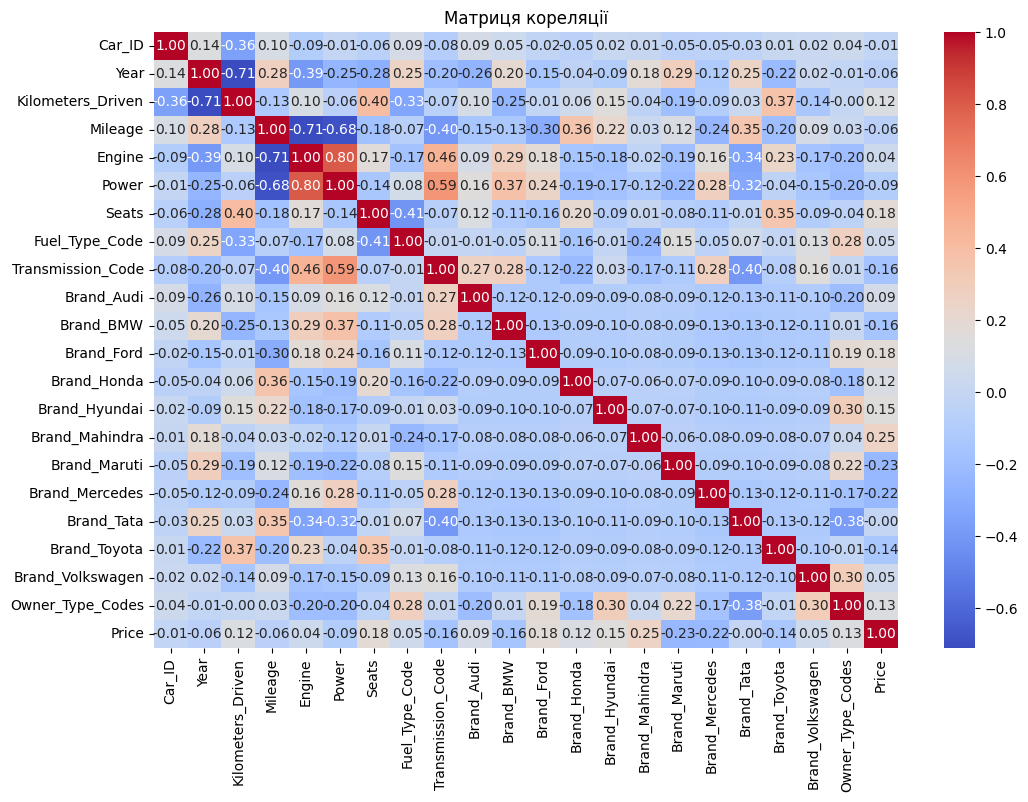

In [17]:
correlation_matrix = data_with_target.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Матриця кореляції")
plt.show()

target_correlations = correlation_matrix['Price']
significant_correlations = target_correlations[abs(target_correlations) > 0.5].sort_values(ascending=False)

print("Колонки, які мають кореляцію з цільовою змінною більше 0.5 за модулем:")
print(significant_correlations)

**Висновок**

Жодна з колонок не має значення кореляції з цільовою змінною (Price), яке перевищує 0.5. Це свідчить про те, що жодна з представлених змінних не має прямого сильного впливу на Price. Однак ми бачимо що деякі назви брендів можуть більше чи менше корелювати з ціною. Пальне не має сильної кореляції з ціною.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [18]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE на тренувальному наборі: {rmse_train:.2f}")
print(f"RMSE на тестовому наборі: {rmse_test:.2f}")


RMSE на тренувальному наборі: 210293.58
RMSE на тестовому наборі: 258181.56


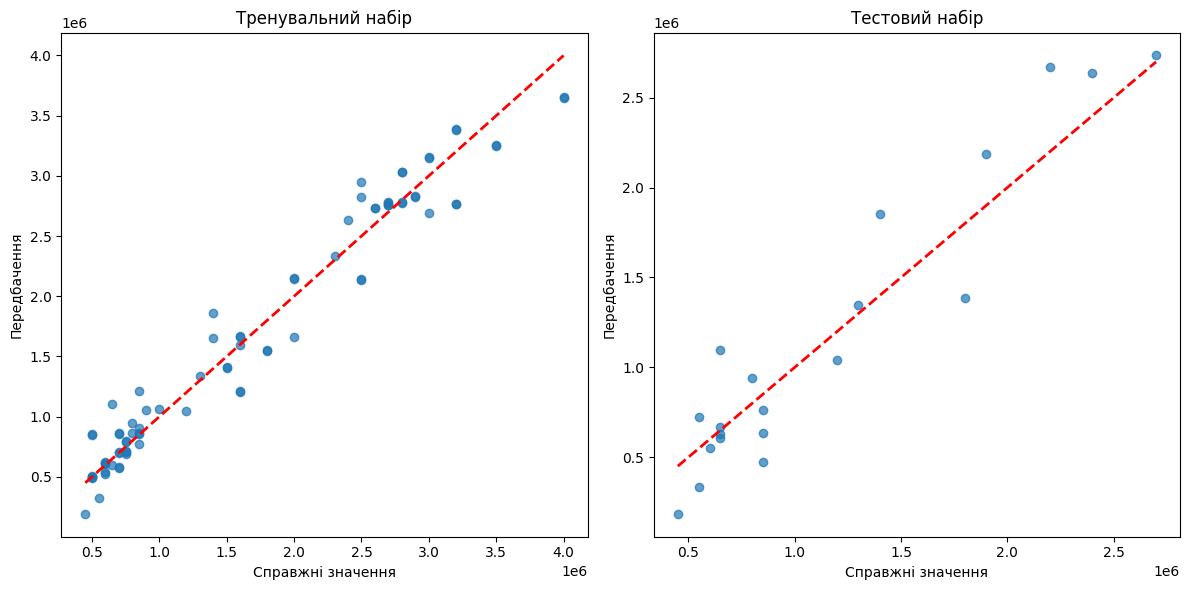

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("Справжні значення")
plt.ylabel("Передбачення")
plt.title("Тренувальний набір")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Справжні значення")
plt.ylabel("Передбачення")
plt.title("Тестовий набір")

plt.tight_layout()
plt.show()

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)

y_train_pred = lr_model_scaled.predict(X_train_scaled)
y_test_pred = lr_model_scaled.predict(X_test_scaled)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE на тренувальному наборі: {rmse_train:.2f}")
print(f"RMSE на тестовому наборі: {rmse_test:.2f}")


RMSE на тренувальному наборі: 210293.58
RMSE на тестовому наборі: 258181.56


Коефіцієнти моделі (від найвпливовіших):
              Feature    Coefficient
5               Power  496769.214899
16     Brand_Mercedes  210048.781148
10          Brand_BMW  208407.313783
9          Brand_Audi  205600.147769
7      Fuel_Type_Code -183848.018909
13      Brand_Hyundai -152304.863911
14     Brand_Mahindra -140945.162904
3             Mileage -131715.512030
11         Brand_Ford -118209.450311
8   Transmission_Code  116693.768206
15       Brand_Maruti -112259.967020
2   Kilometers_Driven  -94398.721486
19   Brand_Volkswagen  -92968.260065
17         Brand_Tata  -65996.246972
12        Brand_Honda  -62753.005386
20   Owner_Type_Codes   42344.952815
4              Engine  -21377.453338
18       Brand_Toyota   15805.701511
1                Year   -8765.645714
0              Car_ID    5608.685421
6               Seats   -2148.924549


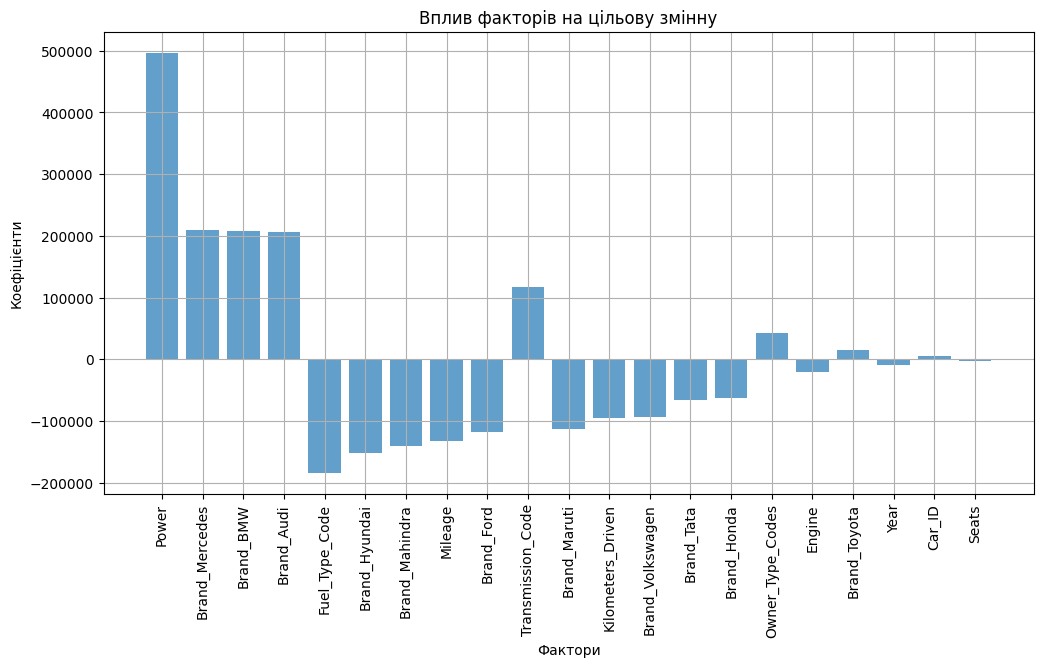

In [21]:
coefficients = lr_model_scaled.coef_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Коефіцієнти моделі (від найвпливовіших):")
print(feature_importance)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], alpha=0.7)
plt.xlabel("Фактори")
plt.ylabel("Коефіцієнти")
plt.title("Вплив факторів на цільову змінну")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Колонки, такі як Power, Brand_Mercedes, Brand_BMW, мають позитивний коефіцієнт, що означає, що зі збільшенням цих значень зростає і ціна. Це означає, що потужні автомобілі та автомобілі преміум-класу є дорожчі.

Brand_Hyundai, Brand_Mahindra, Mileage мають негативні коефіцієнти, що вказує на зниження ціни при збільшенні цих значень. Наприклад, автомобілі з великим пробігом (Mileage) або менш популярних брендів зазвичай дешевші.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [28]:
import statsmodels.api as sm

X_train_scaled_with_const = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_scaled_with_const)
results = model.fit()

print(results.summary())

p_values = results.pvalues
significant_features = p_values[p_values < 0.05].index
significant_features_list = [X_train.columns[int(idx) - 1] for idx in range(len(p_values)) if p_values[idx] < 0.05 and idx != 0]

print("\nСтатистично значущі ознаки на рівні значущості 0.05:")
print(significant_features_list)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        18:33:58   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.74e+04     61.363      0.0

<ipython-input-28-d3e6e2870e4b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  significant_features_list = [X_train.columns[int(idx) - 1] for idx in range(len(p_values)) if p_values[idx] < 0.05 and idx != 0]


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

significant_features = [
    'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code',
    'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai',
    'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Volkswagen'
]

X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]


scaler = StandardScaler()
X_train_significant_scaled = scaler.fit_transform(X_train_significant)
X_test_significant_scaled = scaler.transform(X_test_significant)

lr_model_significant = LinearRegression()
lr_model_significant.fit(X_train_significant_scaled, y_train)

y_train_pred_significant = lr_model_significant.predict(X_train_significant_scaled)
y_test_pred_significant = lr_model_significant.predict(X_test_significant_scaled)

r2_train = lr_model_significant.score(X_train_significant_scaled, y_train)
r2_test = lr_model_significant.score(X_test_significant_scaled, y_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_significant))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_significant))

print(f"R-squared (тренувальний набір): {r2_train:.4f}")
print(f"R-squared (тестовий набір): {r2_test:.4f}")
print(f"RMSE (тренувальний набір): {rmse_train:.2f}")
print(f"RMSE (тестовий набір): {rmse_test:.2f}")



R-squared (тренувальний набір): 0.9514
R-squared (тестовий набір): 0.8797
RMSE (тренувальний набір): 227824.30
RMSE (тестовий набір): 233241.86


**Висновок**

Модель лінійної регресії, побудована на статистично значущих змінних, демонструє високу якість із R² = 0.9514 на тренувальному наборі та R² = 0.8797 на тестовому. Видалення незначущих змінних зберегло пояснюючу здатність моделі, зменшивши її складність.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [27]:
selected_features_p25 = [
    'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code',
    'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai',
    'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Volkswagen'
]

X_train_p25 = X_train[selected_features_p25]

scaler = StandardScaler()
X_train_p25_scaled = scaler.fit_transform(X_train_p25)

X_train_p25_with_const = sm.add_constant(X_train_p25_scaled)

model_p25 = sm.OLS(y_train, X_train_p25_with_const)
results_p25 = model_p25.fit()

y_train_pred_p25 = results_p25.predict(X_train_p25_with_const)
rmse_train_p25 = np.sqrt(mean_squared_error(y_train, y_train_pred_p25))

print(results_p25.summary())

print(f"RMSE: {rmse_train_p25:.2f}")

print(f"Нова модель R-squared: {results_p25.rsquared:.4f}, Adj. R-squared: {results_p25.rsquared_adj:.4f}")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.12e-39
Time:                        18:28:38   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.78e+04     60.360      0.0

**Висновок**

Я б викорисвувала модель з 9 завдання, тому що тут є баланс між точністю і стабільністю на тестовому наборі (менший RMSE на тестовому наборі в порівнянні з іншими). А також модель використовує лише статистично значущі змінні (
p-value < 0.05), що робить її інтерпретованою та простою.